<a href="https://colab.research.google.com/github/vivupadi/vivupadi/blob/main/TL%20_classification_with%20_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Sample image

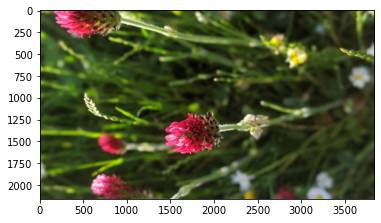

In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision import models

Input_img = Image.open("/content/drive/My Drive/Sondern/flower.jpg")

plt.imshow(Input_img)

Pre-process the image as per the imagenet dataset requirement

In [2]:
transform = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean = [0.485, 0.456, 0.406],
std = [0.229, 0.224, 0.225])
])

Transformed_image = transform(Input_img)
print(Transformed_image.shape)

torch.Size([3, 224, 224])


In [3]:

InputImg_batched = torch.unsqueeze(Transformed_image, 0)
print(InputImg_batched.shape)

torch.Size([1, 3, 224, 224])


In [5]:
resnet = models.resnet101(pretrained = True)

# activating the evaluation mode after this we can feed the input
resnet.eval()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
out = resnet(InputImg_batched)

Read the Imagenet classes text file

In [9]:
with open('/content/drive/My Drive/Data/imagenet1000.txt') as Classesfile:
  ImageNetClasses = [line.strip() for line in Classesfile.readlines()]

Display the predictions in human readable form using imagenet1000.txt file class 

In [11]:
_, predicted = torch.max(out, 1)
percentage = torch.softmax(out, dim = 1)[0] * 100
print(ImageNetClasses[predicted[0]], percentage[predicted[0]].item())

313: 'walking stick, walkingstick, stick insect', 44.286216735839844
